# Meter A

## Data pre-processing

1. Import needed libraries

In [75]:
import pandas as pd
import numpy as np
from sklearn import *
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

2. import dataset

In [76]:
raw_data = pd.read_csv('dataset/Meter A', sep='\t', header=None)
#assigning the columns
raw_data.columns = ['Flatness ratio', 'Symmetry', 'Crossflow',
            'Flow Velocity P1','Flow Velocity P2','Flow Velocity P3','Flow Velocity P4',
            'Flow Velocity P5','Flow Velocity P6','Flow Velocity P7','Flow Velocity P8',
            'Speed of Sound P1','Speed of Sound P2','Speed of Sound P3','Speed of Sound P4',
            'Speed of Sound P5','Speed of Sound P6','Speed of Sound P7','Speed of Sound P8',
            'Average Speed of Sound', 
            'Gain P1T','Gain P1R','Gain P2T','Gain P2R',
             'Gain P3T','Gain P3R','Gain P4T','Gain P4R',
             'Gain P5T','Gain P5R','Gain P6T','Gain P6R',
             'Gain P7T','Gain P7R','Gain P8T','Gain P8R'
            ,'Class']

raw_data

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class
0,0.84150,1.00937,0.99382,8.46981,10.27873,10.03776,8.50136,8.58173,10.24776,10.05882,...,32.45117,34.56869,33.08268,36.72201,36.96940,36.07585,36.05143,35.17415,32.72949,1
1,0.84225,1.00658,0.99661,7.53189,9.13992,8.95162,7.61221,7.62333,9.10635,8.94514,...,32.42838,34.44173,33.08105,36.68782,36.93359,36.05469,35.97982,34.84701,32.73112,1
2,0.84072,1.01165,0.99815,6.64170,7.97546,7.85769,6.59312,6.68157,7.96460,7.81470,...,32.42838,34.27571,33.11360,36.66179,36.87337,36.00261,35.96354,34.68913,32.77181,1
3,0.84112,1.01781,0.99681,5.68752,6.82433,6.68988,5.61543,5.76332,6.80105,6.68664,...,32.48535,34.08040,33.17057,36.67318,36.81153,35.97494,35.95540,34.50033,32.84994,1
4,0.84036,1.01653,0.99622,5.66038,6.82956,6.67563,5.62398,5.73682,6.81345,6.67238,...,32.50326,34.12272,33.16406,36.67318,36.82617,35.99609,35.96843,34.47428,32.85319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.79293,1.00629,0.99967,2.69669,3.41405,3.38973,2.69962,2.71563,3.41404,3.39357,...,32.55534,33.76790,33.30078,36.64063,36.69108,35.84961,35.83496,33.82325,33.01270,2
83,0.79231,1.00447,0.99987,2.67901,3.43364,3.38661,2.71434,2.69984,3.42914,3.38037,...,32.54557,33.76953,33.29427,36.63412,36.69271,35.85938,35.84473,33.81999,33.02246,2
84,0.79347,1.00956,1.00111,2.69155,3.43174,3.36479,2.71738,2.70056,3.43288,3.37405,...,32.56185,33.78093,33.28776,36.63575,36.69434,35.85449,35.83170,33.82487,33.02083,2
85,0.79673,1.01057,0.99903,2.71485,3.41282,3.38893,2.69278,2.73812,3.41374,3.38178,...,32.55534,33.77441,33.30241,36.64063,36.69922,35.85938,35.84961,33.81673,33.01107,2


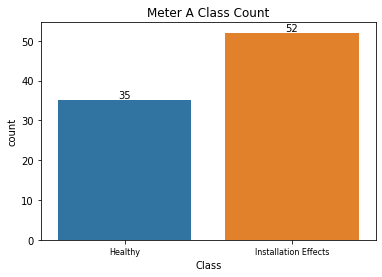

In [77]:
ax = sns.countplot(x=raw_data['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Installation Effects'], fontsize=8) 
ax.set_title("Meter A Class Count")
plt.show()

3. Check for duplicates

In [78]:
dups = raw_data.duplicated()
print("There are {} duplicate rows".format(dups.sum()))

There are 0 duplicate rows


<font size="5" color='blue'> There are no duplicates n the Dataset </font>

4. Check for missing values

In [79]:
# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",raw_data.shape)
res = raw_data.notnull()
print("\nDataFrame displaying False for Null (NaN) value = \n",res)

raw_data = raw_data.dropna()
print("\nDataFrame after removing null values...\n",raw_data)
print("\n(Updated) Number of rows and column in our DataFrame = ",raw_data.shape)


Number of rows and column in our DataFrame =  (87, 37)

DataFrame displaying False for Null (NaN) value = 
     Flatness ratio  Symmetry  Crossflow  Flow Velocity P1  Flow Velocity P2  \
0             True      True       True              True              True   
1             True      True       True              True              True   
2             True      True       True              True              True   
3             True      True       True              True              True   
4             True      True       True              True              True   
..             ...       ...        ...               ...               ...   
82            True      True       True              True              True   
83            True      True       True              True              True   
84            True      True       True              True              True   
85            True      True       True              True              True   
86            True    

<font size="5" color='blue'> No missing values found</font> 

5. Check for 0 values

In [80]:
#check for any 0 value in any column
raw_data.eq(0).any()

Flatness ratio            False
Symmetry                  False
Crossflow                 False
Flow Velocity P1          False
Flow Velocity P2          False
Flow Velocity P3          False
Flow Velocity P4          False
Flow Velocity P5          False
Flow Velocity P6          False
Flow Velocity P7          False
Flow Velocity P8          False
Speed of Sound P1         False
Speed of Sound P2         False
Speed of Sound P3         False
Speed of Sound P4         False
Speed of Sound P5         False
Speed of Sound P6         False
Speed of Sound P7         False
Speed of Sound P8         False
Average Speed of Sound    False
Gain P1T                  False
Gain P1R                  False
Gain P2T                  False
Gain P2R                  False
Gain P3T                  False
Gain P3R                  False
Gain P4T                  False
Gain P4R                  False
Gain P5T                  False
Gain P5R                  False
Gain P6T                  False
Gain P6R

<font size="5" color='blue'> No 0 values found</font> 

6. Check for outliers and remove

In [81]:
raw_data = raw_data[(np.abs(stats.zscore(raw_data)) < 3).all(axis=1)]
data_no_outlier = raw_data # rename data
data_no_outlier = data_no_outlier.reset_index(drop=True)
data_no_outlier

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class
0,0.84150,1.00937,0.99382,8.46981,10.27873,10.03776,8.50136,8.58173,10.24776,10.05882,...,32.45117,34.56869,33.08268,36.72201,36.96940,36.07585,36.05143,35.17415,32.72949,1
1,0.84225,1.00658,0.99661,7.53189,9.13992,8.95162,7.61221,7.62333,9.10635,8.94514,...,32.42838,34.44173,33.08105,36.68782,36.93359,36.05469,35.97982,34.84701,32.73112,1
2,0.84072,1.01165,0.99815,6.64170,7.97546,7.85769,6.59312,6.68157,7.96460,7.81470,...,32.42838,34.27571,33.11360,36.66179,36.87337,36.00261,35.96354,34.68913,32.77181,1
3,0.84112,1.01781,0.99681,5.68752,6.82433,6.68988,5.61543,5.76332,6.80105,6.68664,...,32.48535,34.08040,33.17057,36.67318,36.81153,35.97494,35.95540,34.50033,32.84994,1
4,0.84036,1.01653,0.99622,5.66038,6.82956,6.67563,5.62398,5.73682,6.81345,6.67238,...,32.50326,34.12272,33.16406,36.67318,36.82617,35.99609,35.96843,34.47428,32.85319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.79293,1.00629,0.99967,2.69669,3.41405,3.38973,2.69962,2.71563,3.41404,3.39357,...,32.55534,33.76790,33.30078,36.64063,36.69108,35.84961,35.83496,33.82325,33.01270,2
79,0.79231,1.00447,0.99987,2.67901,3.43364,3.38661,2.71434,2.69984,3.42914,3.38037,...,32.54557,33.76953,33.29427,36.63412,36.69271,35.85938,35.84473,33.81999,33.02246,2
80,0.79347,1.00956,1.00111,2.69155,3.43174,3.36479,2.71738,2.70056,3.43288,3.37405,...,32.56185,33.78093,33.28776,36.63575,36.69434,35.85449,35.83170,33.82487,33.02083,2
81,0.79673,1.01057,0.99903,2.71485,3.41282,3.38893,2.69278,2.73812,3.41374,3.38178,...,32.55534,33.77441,33.30241,36.64063,36.69922,35.85938,35.84961,33.81673,33.01107,2


4 rows removed due for z-score

<AxesSubplot:>

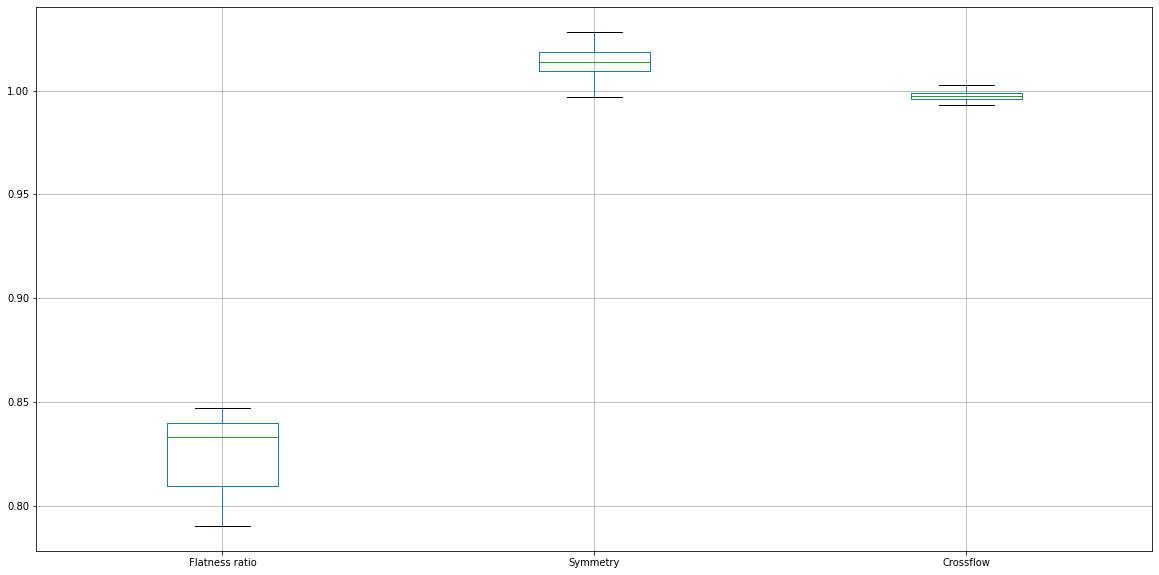

In [82]:
data_no_outlier[['Flatness ratio', 'Symmetry', 'Crossflow']].boxplot(figsize=(20,10))

<AxesSubplot:>

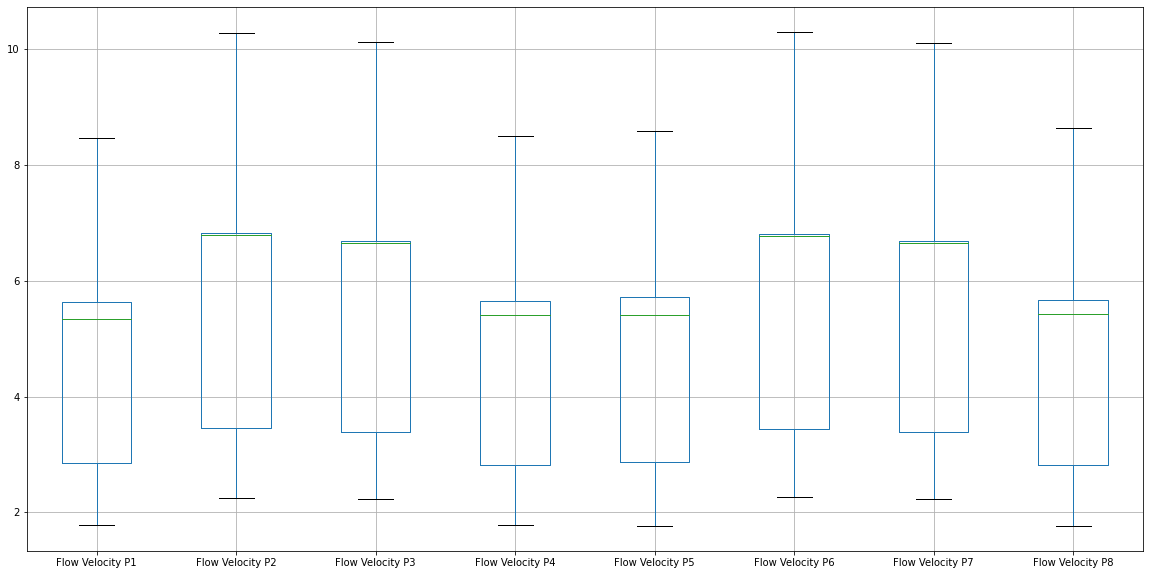

In [83]:
data_no_outlier[['Flow Velocity P1','Flow Velocity P2','Flow Velocity P3','Flow Velocity P4',
            'Flow Velocity P5','Flow Velocity P6','Flow Velocity P7','Flow Velocity P8']].boxplot(figsize=(20,10))

(83, 37)

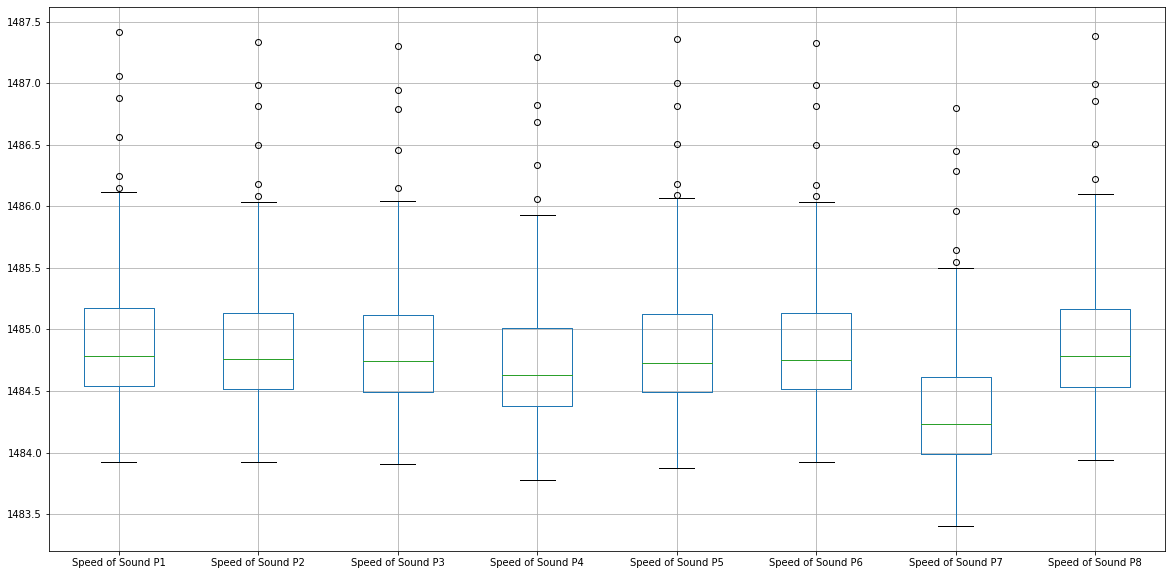

In [84]:
data_no_outlier[['Speed of Sound P1','Speed of Sound P2','Speed of Sound P3','Speed of Sound P4',
            'Speed of Sound P5','Speed of Sound P6','Speed of Sound P7','Speed of Sound P8']].boxplot(figsize=(20,10))
data_no_outlier.shape

<font size="5" color='blue'> Found some outliers removing them </font> 

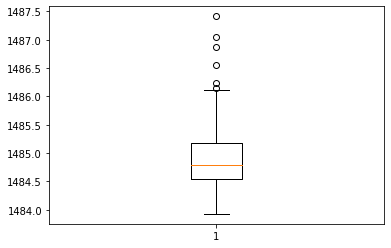

<Figure size 720x504 with 0 Axes>

IQR: 0.6309165000000121 Upper bound: 1486.12062475 Lower bound: 1483.5969587499999
Number of outliers: 6
The following are the outliers in the boxplot: 
17   1487.05683
18   1486.56217
19   1486.14700
65   1487.41567
66   1486.87867
67   1486.24350
Name: Speed of Sound P1, dtype: float64


(83, 37)

In [85]:
val_1 = data_no_outlier['Speed of Sound P1']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)


outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print("Number of outliers: "+ str(len(outliers)))
print('The following are the outliers in the boxplot: \n{}'.format(outliers))
data_no_outlier.shape

<font size="5" color='blue'> Removing 6 rows</font> 

(77,)


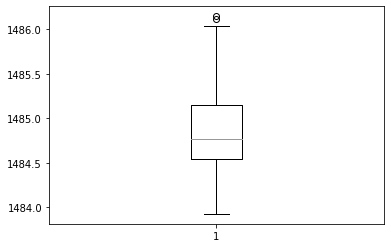

<Figure size 720x504 with 0 Axes>

After remove IQT outliers Shape: (77, 37)


,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class
0,0.84150,1.00937,0.99382,8.46981,10.27873,10.03776,8.50136,8.58173,10.24776,10.05882,...,32.45117,34.56869,33.08268,36.72201,36.96940,36.07585,36.05143,35.17415,32.72949,1
1,0.84225,1.00658,0.99661,7.53189,9.13992,8.95162,7.61221,7.62333,9.10635,8.94514,...,32.42838,34.44173,33.08105,36.68782,36.93359,36.05469,35.97982,34.84701,32.73112,1
2,0.84072,1.01165,0.99815,6.64170,7.97546,7.85769,6.59312,6.68157,7.96460,7.81470,...,32.42838,34.27571,33.11360,36.66179,36.87337,36.00261,35.96354,34.68913,32.77181,1
3,0.84112,1.01781,0.99681,5.68752,6.82433,6.68988,5.61543,5.76332,6.80105,6.68664,...,32.48535,34.08040,33.17057,36.67318,36.81153,35.97494,35.95540,34.50033,32.84994,1
4,0.84036,1.01653,0.99622,5.66038,6.82956,6.67563,5.62398,5.73682,6.81345,6.67238,...,32.50326,34.12272,33.16406,36.67318,36.82617,35.99609,35.96843,34.47428,32.85319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.79293,1.00629,0.99967,2.69669,3.41405,3.38973,2.69962,2.71563,3.41404,3.39357,...,32.55534,33.76790,33.30078,36.64063,36.69108,35.84961,35.83496,33.82325,33.01270,2
73,0.79231,1.00447,0.99987,2.67901,3.43364,3.38661,2.71434,2.69984,3.42914,3.38037,...,32.54557,33.76953,33.29427,36.63412,36.69271,35.85938,35.84473,33.81999,33.02246,2
74,0.79347,1.00956,1.00111,2.69155,3.43174,3.36479,2.71738,2.70056,3.43288,3.37405,...,32.56185,33.78093,33.28776,36.63575,36.69434,35.85449,35.83170,33.82487,33.02083,2
75,0.79673,1.01057,0.99903,2.71485,3.41282,3.38893,2.69278,2.73812,3.41374,3.38178,...,32.55534,33.77441,33.30241,36.64063,36.69922,35.85938,35.84961,33.81673,33.01107,2


In [86]:
data_no_outlier.drop(data_no_outlier.index[[17,18,29,65,66,67]],inplace=True)
data_no_outlier = data_no_outlier.reset_index(drop=True)

val_2 = data_no_outlier['Speed of Sound P1']
print(val_2.shape)
plt.boxplot(val_2)
fig = plt.figure(figsize =(10, 7))
plt.show()


print('After remove IQT outliers Shape: '+str(data_no_outlier.shape))
data_no_outlier

<AxesSubplot:>

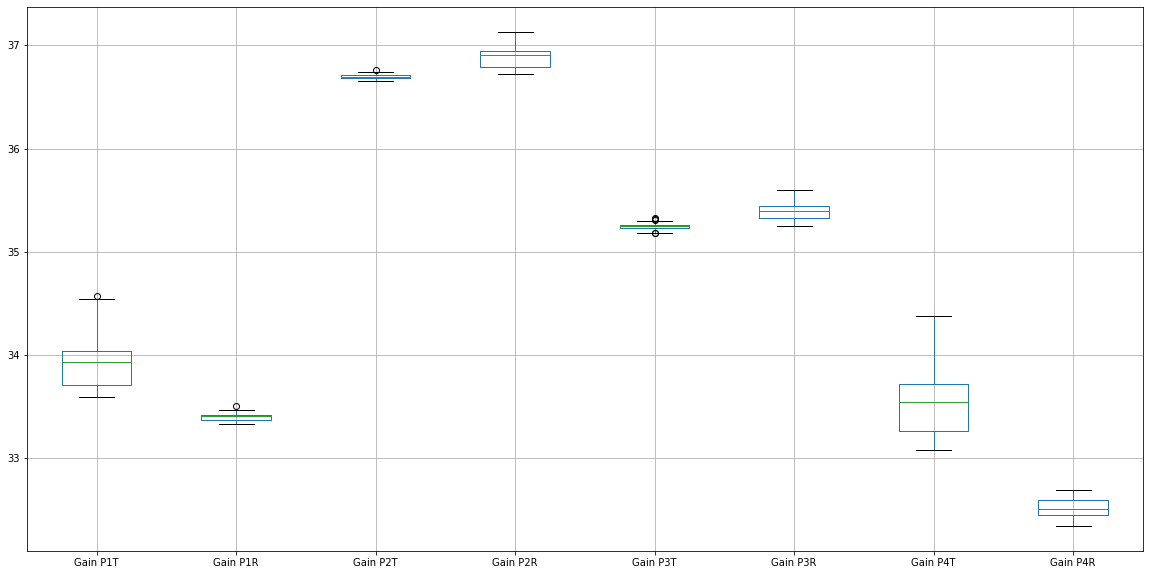

In [87]:
data_no_outlier[['Gain P1T','Gain P1R','Gain P2T','Gain P2R',
             'Gain P3T','Gain P3R','Gain P4T','Gain P4R']].boxplot(figsize=(20,10))

<AxesSubplot:>

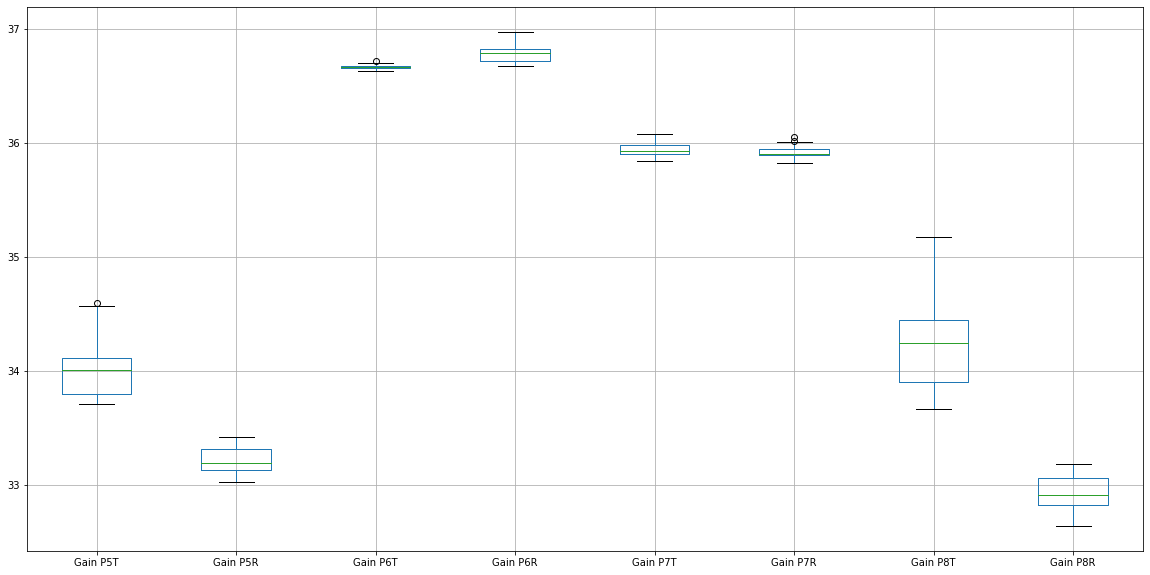

In [88]:
data_no_outlier[['Gain P5T','Gain P5R','Gain P6T','Gain P6R',
             'Gain P7T','Gain P7R','Gain P8T','Gain P8R']].boxplot(figsize=(20,10))

Count Label

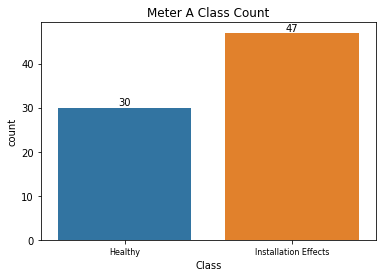

In [89]:
ax = sns.countplot(x=data_no_outlier['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Installation Effects'], fontsize=8) 
ax.set_title("Meter A Class Count")
plt.show()

7. PCA

In [90]:
from sklearn.preprocessing import StandardScaler

featuresCol=['Flatness ratio', 'Symmetry', 'Crossflow',
            'Flow Velocity P1','Flow Velocity P2','Flow Velocity P3','Flow Velocity P4',
            'Flow Velocity P5','Flow Velocity P6','Flow Velocity P7','Flow Velocity P8',
            'Speed of Sound P1','Speed of Sound P2','Speed of Sound P3','Speed of Sound P4',
            'Speed of Sound P5','Speed of Sound P6','Speed of Sound P7','Speed of Sound P8',
            'Average Speed of Sound', 
            'Gain P1T','Gain P1R','Gain P2T','Gain P2R',
             'Gain P3T','Gain P3R','Gain P4T','Gain P4R',
             'Gain P5T','Gain P5R','Gain P6T','Gain P6R',
             'Gain P7T','Gain P7R','Gain P8T','Gain P8R']

# Separating out the features
X = data_no_outlier.drop(['Class'], axis=1)

# Separating out the target
Y =data_no_outlier['Class']

# standardising the features
X_standard = StandardScaler().fit_transform(X)
X = pd.DataFrame(data=X)
print(X.shape)
print(data_no_outlier.shape)
print(X_standard.shape)
print(Y.shape)

(77, 36)
(77, 37)
(77, 36)
(77,)


In [91]:
from sklearn.decomposition import PCA
pcaE = PCA(.95)
X_pca = pcaE.fit_transform(X_standard)
print(X_pca.shape)
print(pcaE.explained_variance_ratio_)

(77, 4)
[0.70938131 0.15302177 0.08295009 0.01547878]


Plotting the PCA

[0.7382990484720097, 0.15925965667082256, 0.08633152508225478, 0.016109769774913074]


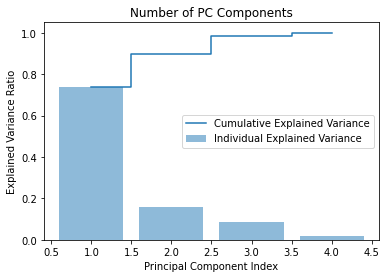

In [92]:
tot = sum(pcaE.explained_variance_)
var_exp = [(i / tot) for i in sorted(pcaE.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

plt.bar(range(1,5), var_exp , alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,5), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Number of PC Components')
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Cumulative Varience')

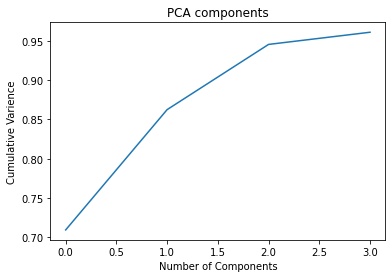

In [93]:
plt.plot(np.cumsum(pcaE.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

Scatterplot before PCA

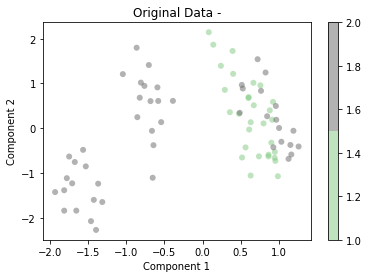

In [94]:
plt.scatter(X_standard[:, 0], X_standard[:, 1],
            c=data_no_outlier['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 2))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data -')
plt.colorbar()

Scatterplot of PCA

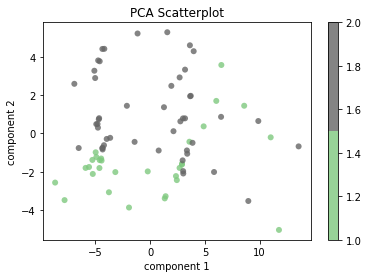

In [95]:
colors = {'1':'b', '0':'r'}
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=Y, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Accent', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA Scatterplot')
plt.colorbar()

C:\Users\sumyu\AppData\Local\Temp\ipykernel_12308\1526493663.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(12,9)).gca(projection='3d')


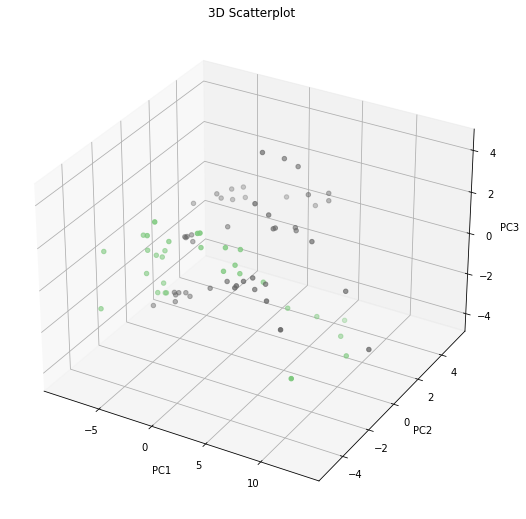

In [96]:
fig = plt.figure(figsize=(12,9)).gca(projection='3d')
plt.title('3D Scatterplot')
fig.scatter(X_pca[:, 0], X_pca[:, 1],X_pca[:, 2]
            ,cmap=plt.cm.get_cmap('Accent', 2),c=Y)
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

Feature Importance

In [97]:
df_pca = pd.DataFrame(abs(pcaE.components_), columns=featuresCol)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P4T,Gain P4R,Gain P5T,Gain P5R,Gain P6T,Gain P6R,Gain P7T,Gain P7R,Gain P8T,Gain P8R
PC1,0.03619,0.08991,0.13226,0.19358,0.19392,0.19393,0.19368,0.19359,0.19397,0.19388,...,0.19149,0.17213,0.19313,0.18357,0.08479,0.18883,0.16264,0.15114,0.19137,0.18657
PC2,0.34231,0.20779,0.00498,0.05526,0.03628,0.03297,0.05091,0.05490,0.03570,0.03288,...,0.08194,0.13899,0.07313,0.06307,0.32830,0.11518,0.22310,0.25563,0.07945,0.06050
PC3,0.18490,0.18558,0.17867,0.08833,0.10111,0.10302,0.09041,0.08949,0.10091,0.10393,...,0.06297,0.18903,0.04008,0.17643,0.15058,0.02356,0.00782,0.03075,0.07613,0.16321
PC4,0.18845,0.83093,0.39474,0.02676,0.01525,0.02091,0.04942,0.02235,0.01406,0.02038,...,0.06992,0.11485,0.00362,0.05191,0.06349,0.03803,0.01922,0.03135,0.04460,0.03662


PC1

In [98]:
df_pc1 =df_pca.iloc[[0]]
a = abs(pcaE.components_[0])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc1 = pd.DataFrame(values,columns=columns)
df_pc1

,Flow Velocity P6,Flow Velocity P3,Flow Velocity P2,Flow Velocity P7,Flow Velocity P8,Flow Velocity P4,Flow Velocity P5,Flow Velocity P1,Gain P5T,Gain P1T,...,Speed of Sound P7,Gain P7T,Gain P7R,Crossflow,Gain P2T,Symmetry,Gain P6T,Gain P3T,Gain P1R,Flatness ratio
0,0.19397,0.19393,0.19392,0.19388,0.19371,0.19368,0.19359,0.19358,0.19313,0.19212,...,0.16341,0.16264,0.15114,0.13226,0.12284,0.08991,0.08479,0.07351,0.04436,0.03619


PC2

In [99]:
df_pc2 =df_pca.iloc[[1]]
a = abs(pcaE.components_[1])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc2 = pd.DataFrame(values,columns=columns)
df_pc2

,Gain P3T,Flatness ratio,Gain P6T,Gain P1R,Gain P7R,Gain P7T,Gain P2T,Symmetry,Speed of Sound P2,Speed of Sound P7,...,Gain P8R,Flow Velocity P1,Flow Velocity P5,Flow Velocity P8,Flow Velocity P4,Flow Velocity P2,Flow Velocity P6,Flow Velocity P3,Flow Velocity P7,Crossflow
0,0.35500,0.34231,0.32830,0.32682,0.25563,0.22310,0.21429,0.20779,0.15845,0.15827,...,0.06050,0.05526,0.05490,0.05216,0.05091,0.03628,0.03570,0.03297,0.03288,0.00498


PC3

In [100]:
df_pc3 =df_pca.iloc[[2]]
a = abs(pcaE.components_[2])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc3 = pd.DataFrame(values,columns=columns)
df_pc3

,Gain P1R,Gain P2T,Speed of Sound P3,Speed of Sound P7,Speed of Sound P2,Speed of Sound P6,Average Speed of Sound,Speed of Sound P8,Speed of Sound P4,Speed of Sound P5,...,Flow Velocity P1,Gain P8T,Gain P4T,Gain P1T,Gain P2R,Gain P5T,Gain P3R,Gain P7R,Gain P6R,Gain P7T
0,0.26271,0.25735,0.24553,0.24528,0.24503,0.24499,0.24141,0.23872,0.23803,0.23695,...,0.08833,0.07613,0.06297,0.05873,0.04503,0.04008,0.03345,0.03075,0.02356,0.00782


PC4

In [101]:
df_pc4 =df_pca.iloc[[3]]
a = abs(pcaE.components_[3])
b = zip(featuresCol,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc4 = pd.DataFrame(values,columns=columns)
df_pc4

,Symmetry,Crossflow,Gain P1R,Flatness ratio,Gain P4R,Gain P3T,Gain P4T,Gain P6T,Gain P5R,Flow Velocity P4,...,Flow Velocity P2,Speed of Sound P1,Flow Velocity P6,Speed of Sound P3,Average Speed of Sound,Speed of Sound P7,Gain P1T,Gain P5T,Speed of Sound P8,Speed of Sound P4
0,0.83093,0.39474,0.25425,0.18845,0.11485,0.10504,0.06992,0.06349,0.05191,0.04942,...,0.01525,0.01510,0.01406,0.01199,0.01172,0.01134,0.01030,0.00362,0.00242,0.00193


## Biplots

PC1 and PC2

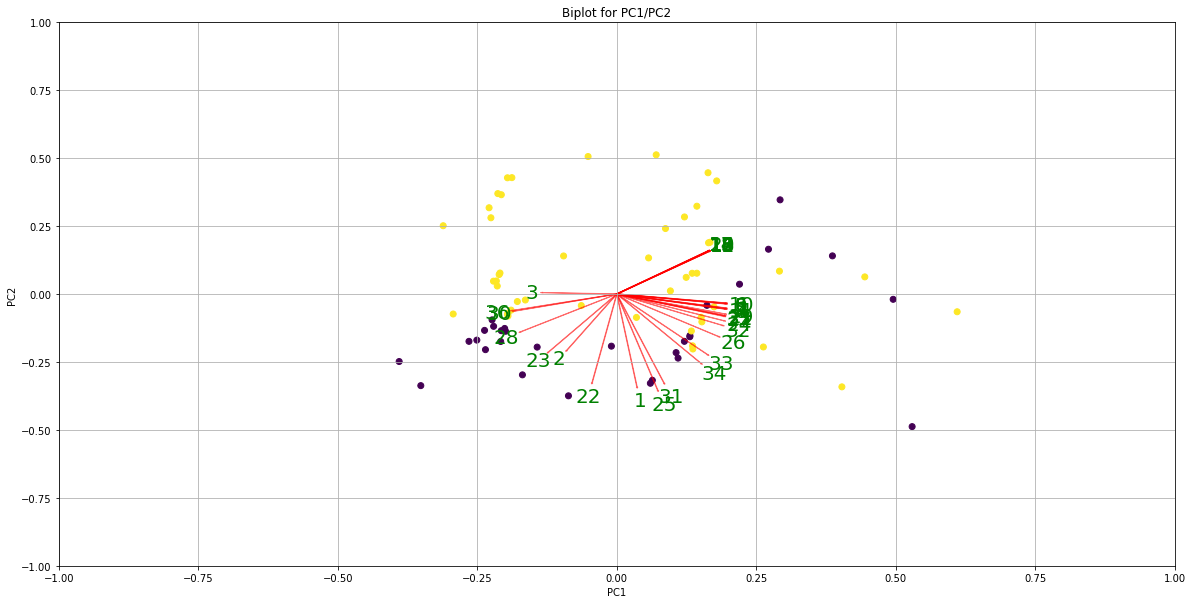

In [102]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y= data_no_outlier['Class']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1),fontsize=20, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pcaE.components_[0:2, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC1/PC2')
plt.xlabel("PC1".format(1))
plt.ylabel("PC2".format(2))
plt.show()

PC3 and PC4

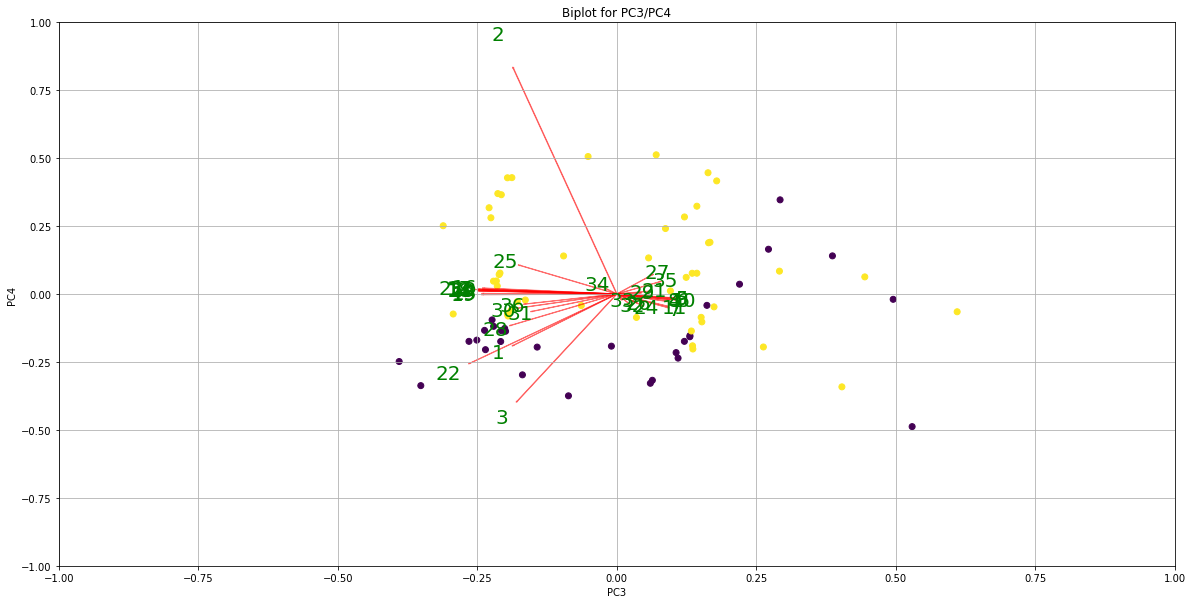

In [103]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pcaE.components_[2:4, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC3/PC4')
plt.xlabel("PC3".format(1))
plt.ylabel("PC4".format(2))
plt.show()

# Data mining

Compare 70/30 vs 80/20

In [104]:
# select dataset
dataset = data_no_outlier
X = dataset.drop(['Class'], axis=1)
Y = dataset['Class']

from sklearn.model_selection import train_test_split
# use this as main model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform pca on dataset 
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



## __2) Supervised Learning__
Supervised learning is a machine learning approach that is defined by the use of labelled datasets. As a result, by using labelled inputs, the model can measure its own accuracy and predict outcome accuracy through learning new data over time.

Includes:
- Logistic Regression
- Linear Support Vector Machine
- Non-Linear Support Vector Machine
- Decision Tree
- Neural Network
- Naives Bayes
- Linear Discriminant 


### Linear Prediction using Logistics Regression 
Logistic regression estimates the probability of an event occurring based on a given dataset of independent variables. Since outcome is a probability, the dependent variable is bounded between 0 to 1 value.

Model score: 0.71
Highest training accuracy: 0.71
Highest testing accuracy: 0.71
Lowest testing accuracy: 0.62


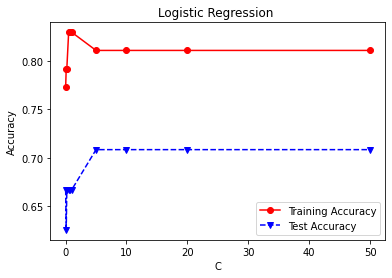

In [105]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression ')

print (f"Model score: {round(clf3.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(LRtestAcc),2))
print("Highest testing accuracy:", round(max(LRtestAcc),2))
print("Lowest testing accuracy:", round(min(LRtestAcc),2))




### Linear Support Vector Machine
The objective of the support vector machine is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The number of hyperplanes will be based on the number of input features.


Model score: 0.67
Highest training accuracy: 0.71
Highest testing accuracy: 0.71
Lowest testing accuracy: 0.62


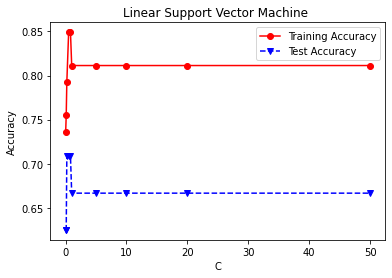

In [106]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear Support Vector Machine ')
print (f"Model score: {round(clf4.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(SVMtestAcc),2))
print("Highest testing accuracy:", round(max(SVMtestAcc),2))
print("Lowest testing accuracy:", round(min(SVMtestAcc),2))



### Non Linear Support Vector Machine(SVM)
Where there are more than three classes, when they are not linearly separable. Non linear support vector machines will be required to classify these data points. 

Model score: 0.83
Highest training accuracy: 0.96
Highest testing accuracy: 0.96
Lowest testing accuracy: 0.79


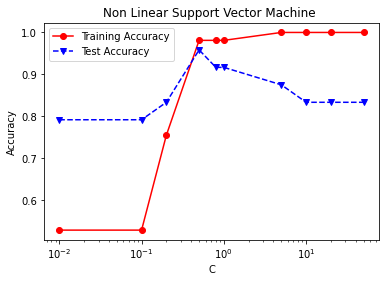

In [107]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(X_train, y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Non Linear Support Vector Machine ')

print (f"Model score: {round(clf5.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(SVMtestAcc),2))
print("Highest testing accuracy:", round(max(SVMtestAcc),2))
print("Lowest testing accuracy:", round(min(SVMtestAcc),2))

### Decision Tree
A decision tree is similar to a flowchart where each internal nodes denotes a test on an attribute where each branch represents an outcome of the test and each leaf nodes contains a class label.


Model score: 0.92
Highest training accuracy: 1.0
Highest testing accuracy: 0.92
Lowest testing accuracy: 0.88


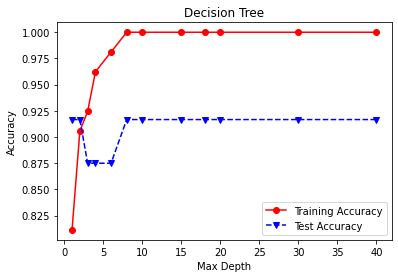

In [108]:
from sklearn.tree import DecisionTreeClassifier

clf7 = DecisionTreeClassifier(max_depth=10)
C = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in C:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(X_train, y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, dt_trainAcc, 'ro-', C, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.title('Decision Tree')
print (f"Model score: {round(clf7.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(dt_trainAcc),2))
print("Highest testing accuracy:", round(max(dt_testAcc),2))
print("Lowest testing accuracy:", round(min(dt_testAcc),2))

In [109]:
Y = dataset['Class']
X = dataset.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=59)
clf = clf.fit(X, Y)

[Text(0.3333333333333333, 0.875, 'Flatness ratio <= 0.822\nentropy = 0.965\nsamples = 77\nvalue = [30, 47]\nclass = 2'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30]\nclass = 2'),
 Text(0.5, 0.625, 'Speed of Sound P3 <= 1484.567\nentropy = 0.944\nsamples = 47\nvalue = [30, 17]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]\nclass = 1'),
 Text(0.6666666666666666, 0.375, 'Flow Velocity P6 <= 6.794\nentropy = 0.978\nsamples = 29\nvalue = [12, 17]\nclass = 2'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]\nclass = 2'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.811\nsamples = 16\nvalue = [12, 4]\nclass = 1')]

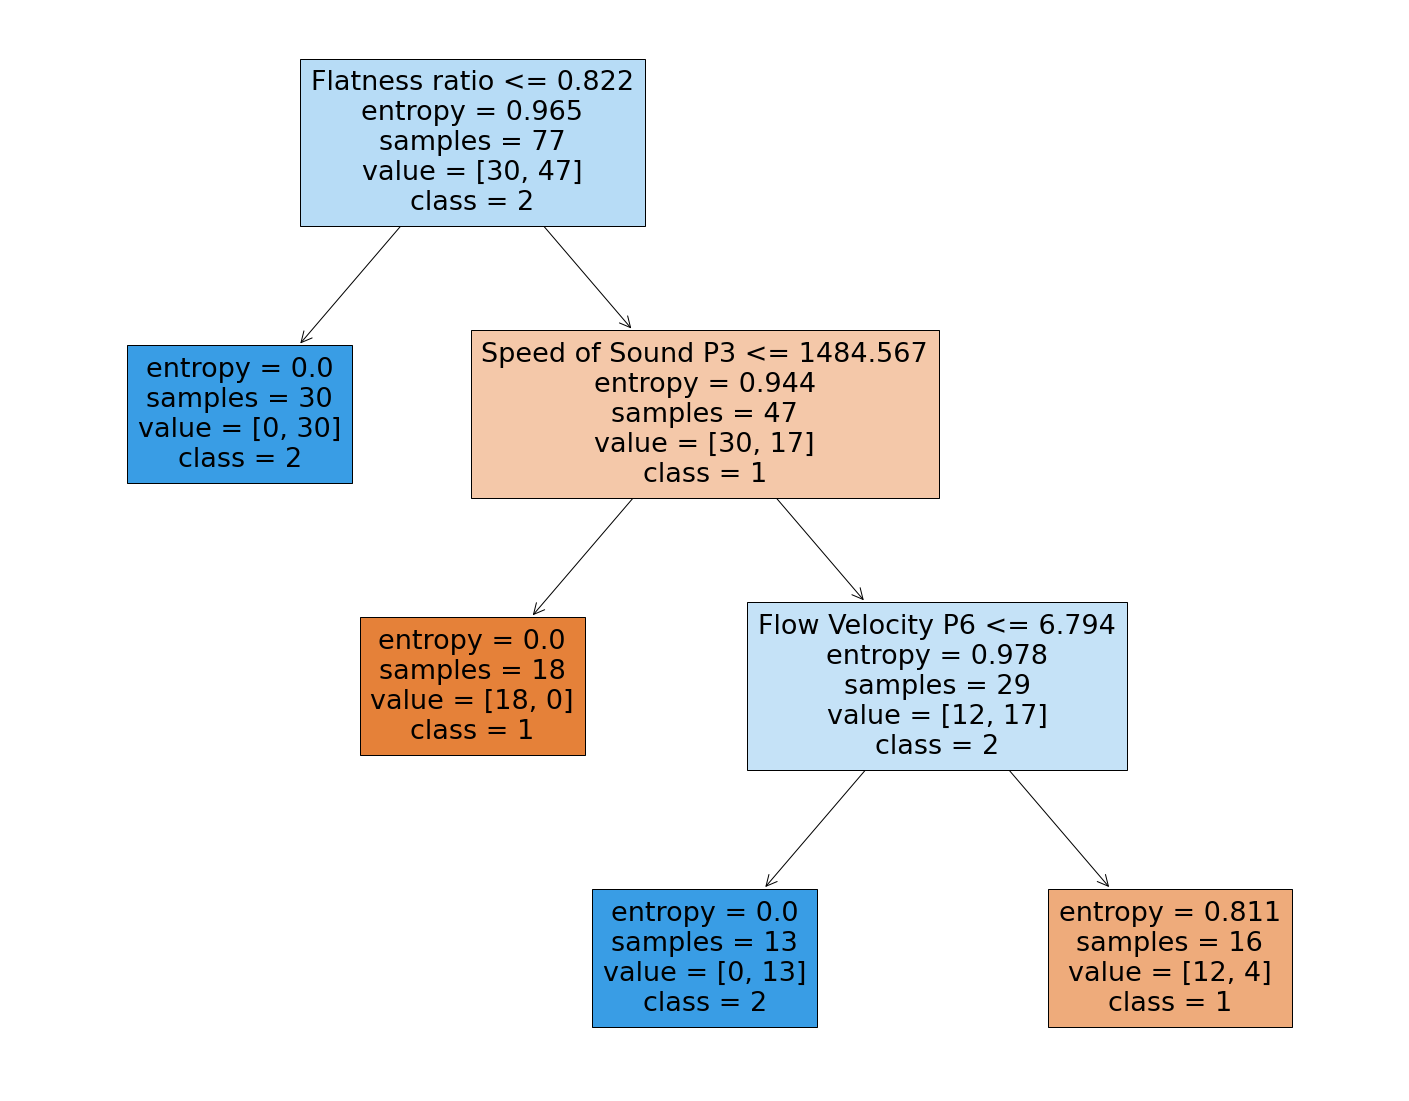

In [110]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=['1','2','3','4'],filled=True, impurity=True)

### Neural Network
Artificial neural networks (ANN) are composed of a node layer, containing an input layer, one or more hidden layers and an output layer.


Model score: 0.88
Highest training accuracy: 1.0
Highest testing accuracy: 0.92
Lowest testing accuracy: 0.88


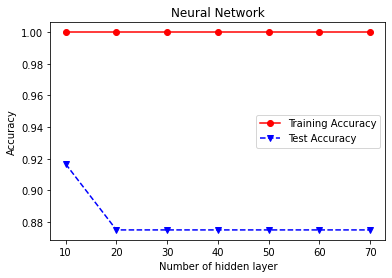

In [111]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

plt.title('Neural Network')
print (f"Model score: {round(clf6.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(trainAcc),2))
print("Highest testing accuracy:", round(max(testAcc),2))
print("Lowest testing accuracy:", round(min(testAcc),2))

### Naive Bayes
Naive Bayes is a classification based that assumes the presence of a feature in class is not related to any feature. Hence, it is used in binary classification problems.


In [112]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(y_train, Y_predTrain)
testAcc=accuracy_score(y_test, Y_predTest)


print (f"Model score: {round(clf2.score(X_test, y_test),2)}")
print("Training Accuracy:",round(trainAcc,2))
print("Testing Accuracy:",round(testAcc,2))

Model score: 0.71
Training Accuracy: 0.81
Testing Accuracy: 0.71


### Linear Discriminant
Linear Discriminants is a statistical method of dimensionality reduction that provides the highest possible discrimination among various classes.


In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print (f"Model score: {round(lda.score(X_test, y_test),2)}")
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Model score: 0.71
Accuracy of LDA classifier on training set: 0.81
Accuracy of LDA classifier on test set: 0.71


## __3) Unsupervised Learning__
Unsupervised learning uses machine learning algorithms to analyse and cluster unlabeled dataset. By doing so, it will be able to discover hidden patterns in the data without the need of human intervention.

Includes:
- K Nearest Neighbor (KNN)
- K Means Clustering


### K Nearest Neighbour (KNN)
KNN algorithm assumes that similar data points exist in a close proximity. Hence, working off the assumption that similar points can be found near each other. A class label will be assigned based on majority voting.



Model score: 0.58
Highest training accuracy: 1.0
Highest testing accuracy: 0.83
Lowest testing accuracy: 0.5


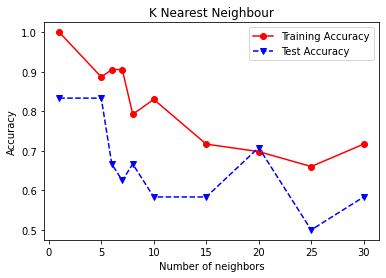

In [114]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 6,7,8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plt.title('K Nearest Neighbour')

print (f"Model score: {round(clf1.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(trainAcc),2))
print("Highest testing accuracy:", round(max(testAcc),2))
print("Lowest testing accuracy:", round(min(testAcc),2))

### K-Means Clustering
K-Means algorithms in data mining starts with randomly selecting the centroid for the first group, which will be used as the beginning points for every cluster. Depending on the number of data points, the new centroid optimised position will be determined through iterative calculation. 

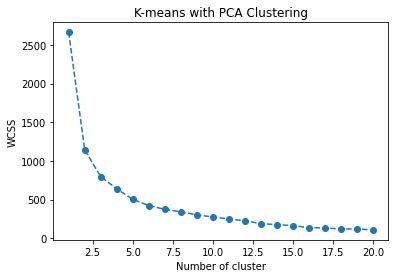

In [115]:
from sklearn import cluster

wcss =[]
for i in range(1,21):
    kmeans_pca = cluster.KMeans(n_clusters =i,init='k-means++',random_state=0)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

We can see the elbow at 3 classes

In [116]:
kmeans_pca = cluster.KMeans(n_clusters =2,init='k-means++',random_state=0)
kmeans_pca.fit(X_pca)

KMeans(n_clusters=2, random_state=0)

In [117]:
df_segm_pca_kmeans = pd.concat([data_no_outlier.reset_index(drop=True),pd.DataFrame(X_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-4:] =['PC1','PC2','PC3','PC4']
df_segm_pca_kmeans['K-means']= kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Flatness ratio,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Flow Velocity P5,Flow Velocity P6,Flow Velocity P7,...,Gain P7T,Gain P7R,Gain P8T,Gain P8R,Class,PC1,PC2,PC3,PC4,K-means
0,0.84150,1.00937,0.99382,8.46981,10.27873,10.03776,8.50136,8.58173,10.24776,10.05882,...,36.07585,36.05143,35.17415,32.72949,1,11.76312,-5.03836,-1.08140,-0.69268,1
1,0.84225,1.00658,0.99661,7.53189,9.13992,8.95162,7.61221,7.62333,9.10635,8.94514,...,36.05469,35.97982,34.84701,32.73112,1,11.00786,-0.20206,-3.06547,-0.86692,1
2,0.84072,1.01165,0.99815,6.64170,7.97546,7.85769,6.59312,6.68157,7.96460,7.81470,...,36.00261,35.96354,34.68913,32.77181,1,8.58855,1.44874,-3.47286,-0.34403,1
3,0.84112,1.01781,0.99681,5.68752,6.82433,6.68988,5.61543,5.76332,6.80105,6.68664,...,35.97494,35.95540,34.50033,32.84994,1,2.90846,-1.62363,0.47756,0.52340,1
4,0.84036,1.01653,0.99622,5.66038,6.82956,6.67563,5.62398,5.73682,6.81345,6.67238,...,35.99609,35.96843,34.47428,32.85319,1,1.41546,-3.27821,3.08102,0.48817,1


### Scatterplots using K-means

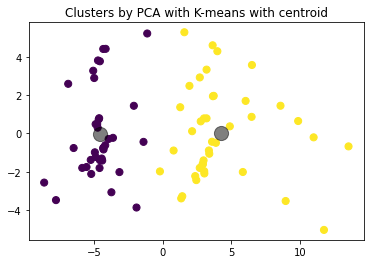

In [118]:
df_segm_pca_kmeans['Class']=df_segm_pca_kmeans['K-means'].map({0:1,1:2,2:3})

x_axis= df_segm_pca_kmeans['PC1']
y_axis= df_segm_pca_kmeans['PC2']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, s=50, cmap='viridis')
centers = kmeans_pca.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['Class'],palette=['g','r'])
plt.title('Clusters by PCA with K-means with centroid')
plt.show()

C:\Users\sumyu\AppData\Local\Temp\ipykernel_12308\2335112636.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(12,9)).gca(projection='3d')


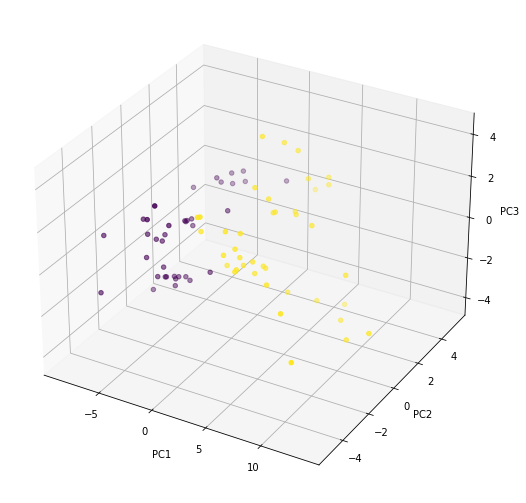

In [119]:
fig = plt.figure(figsize=(12,9)).gca(projection='3d')
fig.scatter(df_segm_pca_kmeans['PC1'],df_segm_pca_kmeans['PC2']
            ,df_segm_pca_kmeans['PC3'],cmap=plt.cm.get_cmap('viridis', 2),c=df_segm_pca_kmeans['Class'])
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

## __4) Anomaly Detection using Random Forest__
Random forest consists of generating multiple random decision trees and the results are concluded through majority voting. Hence, it is less sensitive to changes in the training data.

Confusion matrix is used to measure performance of any machine learning classification problem where depending on the number of classes, it will affect the dimension size of the matrix containing a combination of predicted and actual values.


In [120]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [121]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


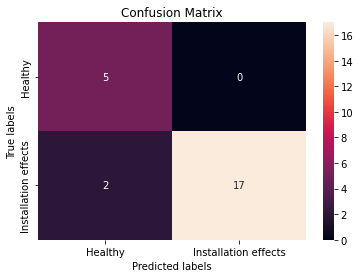

Accuracy : 0.92


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Healthy', 'Installation effects']) 
ax.yaxis.set_ticklabels(['Healthy', 'Installation effects']) 
plt.show()

print('Accuracy : ' + str(round(accuracy_score(y_test, y_pred),2)))

## __5) Anomaly Detection using Linear Regression(MSE, MAE, RMSE)__
Linear regression fits a straight line across two variables and is used to predict the value of a variable based on the value of another variable. The predicted variable is called the dependent variable while the variable used to predict another variable is called the independent variable. 

Display linear regression between PC1 and PC2


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(X_pca)
df.head()

,0,1,2,3
0,11.76312,-5.03836,-1.08140,-0.69268
1,11.00786,-0.20206,-3.06547,-0.86692
2,8.58855,1.44874,-3.47286,-0.34403
3,2.90846,-1.62363,0.47756,0.52340
4,1.41546,-3.27821,3.08102,0.48817


In [124]:
XTemp = df[0].values.reshape(-1, 1)
yTemp = df[1].values.reshape(-1, 1)

In [125]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(
        XTemp, yTemp, test_size=0.3, random_state=0)

In [126]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
y_predTemp = regressorTemp.predict(X_testTemp)

In [127]:
print('Mean Absolute Error:',
          round(metrics.mean_absolute_error(y_testTemp, y_predTemp),2))
print('Mean Squared Error:',
        round(metrics.mean_squared_error(y_testTemp, y_predTemp),2))
print('Root Mean Squared Error:',
        round(np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)),2))
        
# get intercept:
print("y intercept: " + str(regressorTemp.intercept_))
# get slope:
print("slope: " + str(regressorTemp.coef_))

Mean Absolute Error: 1.73
Mean Squared Error: 5.55
Root Mean Squared Error: 2.36
y intercept: [-0.04496526]
slope: [[0.01225709]]


Text(0, 0.5, 'PC2')

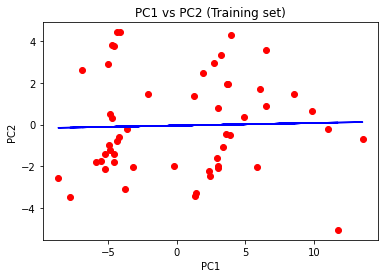

In [128]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

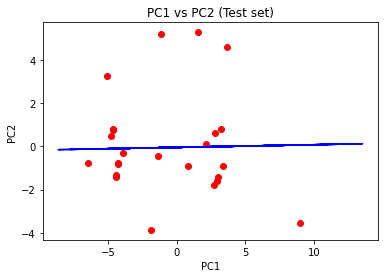

In [129]:
  # show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')